In [1]:
import pandas as pd
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [2]:
exp_name = 'bt2'
exp_dir = f'../experiments/{exp_name}/'
checkpoint_dir = exp_dir + 'checkpoints_SeqClassifier/'

training_history_file = checkpoint_dir + 'trainer_state.json'

output_dir = exp_dir + 'figs/'

print(f"Going to read from {training_history_file} and save the figure to {output_dir}")

Going to read from ../experiments/bt2/checkpoints_SeqClassifier/trainer_state.json and save the figure to ../experiments/bt2/figs/


In [3]:
required_cols = ['epoch', 'learning_rate', 'loss', 'step', 'eval_loss', 'eval_f1']

In [4]:
with open(training_history_file, 'r') as state_file:
    trainer_state = json.load(state_file)
log_history = trainer_state['log_history']
df_log_hist = pd.DataFrame(log_history)
df_log_hist = df_log_hist[required_cols]
df_log_hist = df_log_hist.rename(columns={'loss': 'train_loss'})
df_log_hist

,epoch,learning_rate,train_loss,step,eval_loss,eval_f1
0,0.41,1.908173e-05,0.3633,500,NaN,NaN
1,0.83,1.816345e-05,0.2173,1000,NaN,NaN
2,1.00,NaN,NaN,1210,0.540188,0.761514
3,1.24,1.724518e-05,0.1593,1500,NaN,NaN
4,1.65,1.632691e-05,0.1360,2000,NaN,NaN
5,2.00,NaN,NaN,2420,0.491594,0.778357
6,2.07,1.540863e-05,0.1283,2500,NaN,NaN
7,2.48,1.449036e-05,0.0838,3000,NaN,NaN
8,2.89,1.357208e-05,0.0856,3500,NaN,NaN
9,3.00,NaN,NaN,3630,0.577109,0.791684


In [5]:
if os.path.exists(output_dir):
    raise Exception(f"Dir {output_dir} already exists!")
else:
    os.makedirs(output_dir)

Saved the image to ../experiments/bt2/figs/bt2_train_hist.png


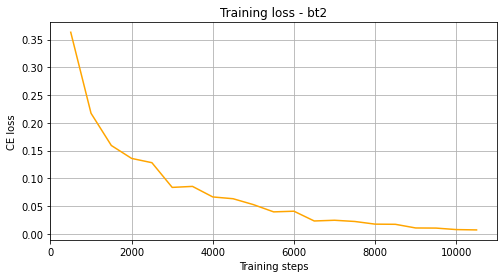

In [6]:
df_vis = df_log_hist.dropna(subset=['train_loss'])
plt.figure(figsize=(8,4))
plt.plot('step', 'train_loss', data=df_vis, color='orange', label='Training Loss')

plt.xlabel('Training steps')
plt.ylabel('CE loss')
plt.title(f'Training loss - {exp_name}')
plt.grid()

# Save the image
train_hist_file = output_dir + exp_name + '_train_hist.png'
plt.savefig(train_hist_file)
print(f"Saved the image to {train_hist_file}")

Saved the image to ../experiments/bt2/figs/bt2_val_hist.png


/tmp/ipykernel_616598/3664404754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis['eval_f1'] = df_vis['eval_f1'] * 100


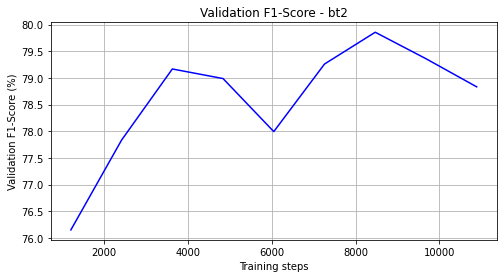

In [7]:
df_vis = df_log_hist.dropna(subset=['eval_f1'])
df_vis['eval_f1'] = df_vis['eval_f1'] * 100
plt.figure(figsize=(8,4))
plt.plot('step', 'eval_f1', data=df_vis, color='blue', label='Validation Loss')

plt.xlabel('Training steps')
plt.ylabel('Validation F1-Score (%)')
plt.title(f'Validation F1-Score - {exp_name}')
plt.grid()

#Save the image
val_hist_file = output_dir + exp_name + '_val_hist.png'
plt.savefig(val_hist_file)
print(f"Saved the image to {val_hist_file}")